# Week 3 lab answers

## Q-3) Plot the function and identify region where it is concave and convex

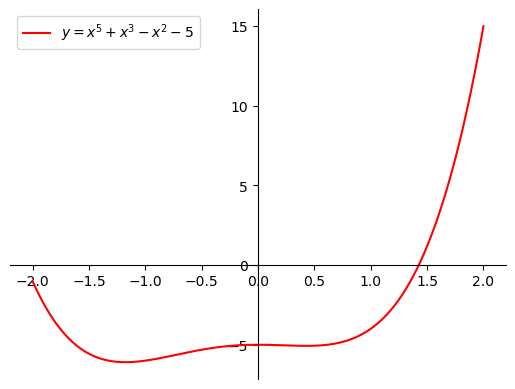

In [4]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# 500 linearly spaced numbers
x = np.linspace(-2,2,500)

# Define cost function, 
def f(x):
    return (x**4 + x**3 - x**2 - 5)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function, you can use latex expression for the labels
plt.plot(x,f(x), 'r', label="$y= x^5 + x^3 - x^2 -5$")
plt.legend(loc='upper left')
# show the plot
plt.show()

### Global Minimum (using default Nelder-mead method)

#### Start Point x0 = -2

In [5]:
# import optimize from scipy
from scipy import optimize

# The default (Nelder Mead)
print(optimize.minimize(f, x0=-2, method='nelder-mead',
               options={'xatol': 1e-5, 'disp': True}))

Optimization terminated successfully.
         Current function value: -6.096735
         Iterations: 20
         Function evaluations: 40
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -6.096734558075643
             x: [-1.175e+00]
           nit: 20
          nfev: 40
 final_simplex: (array([[-1.175e+00],
                       [-1.175e+00]]), array([-6.097e+00, -6.097e+00]))


### Local Minimum

#### Start point x0 = 0

In [7]:
from scipy import optimize

# The default (Nelder Mead)
print(optimize.minimize(f, x0=0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True}))

Optimization terminated successfully.
         Current function value: -5.071234
         Iterations: 35
         Function evaluations: 71
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -5.071234191924322
             x: [ 4.254e-01]
           nit: 35
          nfev: 71
 final_simplex: (array([[ 4.254e-01],
                       [ 4.254e-01]]), array([-5.071e+00, -5.071e+00]))


### Q-4) The approximation of $f(x) = e^{-x} \approx 1- x + \frac{x^2}{2} - \frac{x^3}{3!}$

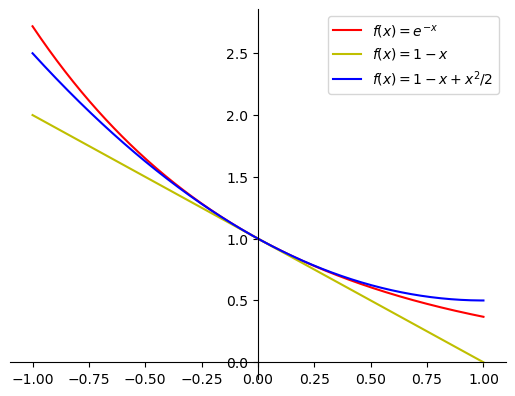

In [23]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# 500 linearly spaced numbers
x = np.linspace(-1,1,500)

# Define cost function, 
def f_ori(x):
    return np.exp(-x)
def f_linear(x):
    return 1- x
def f_quadratic(x):
    return 1 - x + (x ** 2) / 2
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function, you can use latex expression for the labels
plt.plot(x,f_ori(x), 'r', label="$f(x) = e^{-x}$")
plt.plot(x,f_linear(x), 'y', label="$f(x) = 1- x$")
plt.plot(x,f_quadratic(x), 'b', label="$f(x) = 1- x + x^2/2$")
plt.legend(loc='upper right')
# show the plot
plt.show()

## Q-5) $f(x) = -x^3 + 4x^2 - 3x + 5$
##        subject to: $-2 \le x \le 2$

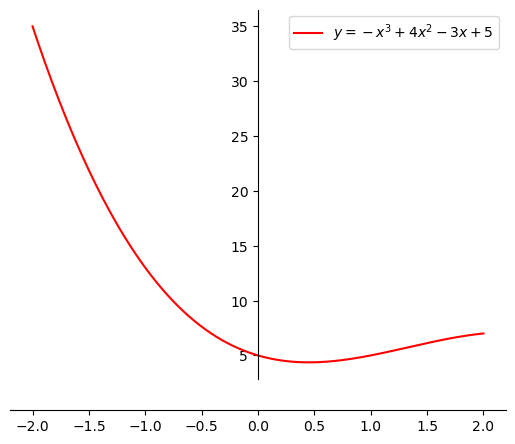

In [19]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# 500 linearly spaced numbers
x = np.linspace(-2,2,500)

# the function, 
def f(x):
    return (-x**3 + 4*x**2 - 3*x + 5)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,f(x), 'r', label='$y= -x^3 + 4x^2 - 3x + 5$')
plt.legend(loc='upper right')
# show the plot
plt.show()

### 5.2) Use Nelder-Mead

In [9]:
# The default (Nelder Mead)
from scipy import optimize
# Define the bounds for the variables
bounds = [(-2, 2)]
print(optimize.minimize(g, x0=0, method='nelder-mead', bounds=bounds,
               options={'xatol': 1e-8, 'disp': True}))

Optimization terminated successfully.
         Current function value: 4.368870
         Iterations: 36
         Function evaluations: 73
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.368869690559101
             x: [ 4.514e-01]
           nit: 36
          nfev: 73
 final_simplex: (array([[ 4.514e-01],
                       [ 4.514e-01]]), array([ 4.369e+00,  4.369e+00]))


## 5.3) Develop Bisection algorithm from scratch

In [51]:
# Import libraries
import numpy as np

# the function, 
def f(x):
    return (-x**3 + 4*x**2 - 3*x + 5)

# set initial value of a and b
a = -2
b = 2

# set the tolerance 
epsilon = 0.0001
delta_x = 0.01

print('    a            b')

for i in range(100):
    print("%.4f" % a,"     ","%.4f" % b) # print the values of a and b at each step
    alpha = (a+b)/2
    derivative = (f(a + delta_x) - f(a - delta_x)) / (2 * delta_x)
    derivative_alpha = (f(alpha + delta_x) - f(alpha - delta_x)) / (2 * delta_x)
    if derivative * derivative_alpha < 0:
        b = alpha
    else:
        a = alpha
        
    if abs(a - b) < epsilon:
        break
    
    print('--------------------------------')
# print the final results
print("x* = %.4f" %a, "  ", "Minimum = %.4f" % f(a))
print('Number of function calls = ', 4*i)
        
    


    a            b
-2.0000       2.0000
--------------------------------
0.0000       2.0000
--------------------------------
0.0000       1.0000
--------------------------------
0.0000       0.5000
--------------------------------
0.2500       0.5000
--------------------------------
0.3750       0.5000
--------------------------------
0.4375       0.5000
--------------------------------
0.4375       0.4688
--------------------------------
0.4375       0.4531
--------------------------------
0.4453       0.4531
--------------------------------
0.4492       0.4531
--------------------------------
0.4512       0.4531
--------------------------------
0.4512       0.4521
--------------------------------
0.4512       0.4517
--------------------------------
0.4514       0.4517
--------------------------------
0.4514       0.4515
x* = 0.4514    Minimum = 4.3689
Number of function calls =  60
